# Application of Inferential Statistics: Washington D.C. and King County Housing Sale Price Analysis

## Data

In [33]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [3]:
# Create df on Macbook
dc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
kc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

# Create df on PC
# dc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
# kc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

dc_df = dc_df.drop(columns='Unnamed: 0')
kc_df = kc_df.drop(columns='Unnamed: 0')

# Average Housing Price: Is there a statistical significance between the average housing sale price between Washington D.C. and King County?

I will compare the difference of means between the housing sale prices in Washington D.C and King County by testing the following hypotheses:

***H<sub>0</sub> :*** The true mean housing sale price between the Washington D.C. and King County are the same <br>
***H<sub>1</sub> :*** The true mean housing sale price between the Washington D.C. and King County are *not* the same <br>
For each, I assume an $\alpha$ level of 0.05

### Washington D.C. Housing Statistics

In [12]:
dc_df.price.describe().apply(lambda x: format(x, 'f'))

count       7160.000000
mean      627126.845391
std       510667.841622
min         5185.000000
25%       345000.000000
50%       517000.000000
75%       749600.000000
max      7395000.000000
Name: price, dtype: object

### King County Housing Statistics

In [11]:
kc_df.price.describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean      540088.141767
std       367127.196483
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

#### Compute the test statistic: Mean of the sampling distribution of the difference between means

In [27]:
test_stat = dc_df.price.mean() - kc_df.price.mean()
print("Mean difference of means for Washington D.C. and King County Housing Sales:", test_stat)

Mean difference of means for Washington D.C. and King County Housing Sales: 87038.70362453209


In order to test for the difference of means between the Washington D.C. and King County housing prices data sets, there are 3 assumptions that I am going to make:

1. The Washington D.C. and King County housing data sets have the same variance
2. Each housing price population is normally distributed
3. Each housing price is sampled independently from each other value. This assumption means that each housing unit sold is for one value only

#### Calculate the Standard Error of the test statistic

The formula for the variance of the sampling distribution of the mean is: 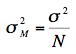
where σ is the standard deviation and N is the sample size.

Because the Washington D.C. and King County are different populations and have different sample sizes, we need to disinguish between them via subscripts to represent each population: 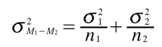


Using the above formulas, I can use 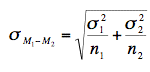
to calculate the standard error of the difference of means between the two populations.

#### Calculate the standard error of the test statistic

In [37]:
# Calculate standard error of test statistic
dc_var = dc_df.price.var()
kc_var = kc_df.price.var()
dc_size = len(dc_df.price)
kc_size = len(kc_df.price)

standard_err = np.sqrt((dc_var / dc_size) + (kc_var / kc_size))

#### Compute the t-statistic and get p-value

Now that I have the standard error, I can plug it into 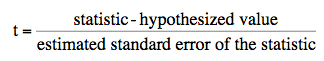
to get the t-statistic and use this to get the probability (p-value) of getting a t as large or larger than the t-statistic or as small or smaller than -(t-statistic).

In [40]:
# Compute t-statistic
t_stat = test_stat / standard_err

# Degrees of freedom
dof = dc_size + kc_size - 2

# Compute p-value
p_val = 1 - stats.t.cdf(t_stat,df=dof)

print(standard_err)
print(t_stat)
print("p-value:", p_val)

6531.323683451542
13.32634973291289
p-value: 0.0


Since the p-value is less than 0.05, I can confidently reject my null hypothesis that the true mean housing sale prices in Washington D.C. and King County are the same.